In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
import seaborn as sns
import geopandas

sns.set_theme(palette = "pastel")

### ANALISIS A NIVEL NACIONAL

Accesos por rangos de velocidad trimestral - Nacional

In [2]:
df_accesos_veloc_nac = pd.read_csv("Datasets\Internet\Acceso_Internet_Fijo_por_rangos_velocidad_bajada_nacional.csv")
df_accesos_veloc_nac.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total,Unnamed: 11
0,2022,1,34.890,104.840,1.263.273,1.209.148,967.508,509.830,6.336.187,198.333,10.624.009,NaN
1,2021,4,41.262,28.521,1.413.208,1.245.333,976.539,558.358,6.032.322,194.251,10.489.794,NaN
2,2021,3,40.174,41.437,2.550.229,1.095.772,710.122,536.364,4.948.174,163.269,10.085.541,NaN
3,2021,2,40.172,42.024,2.531.271,1.080.279,693.277,647.401,4.661.291,167.369,9.863.084,NaN
4,2021,1,39.487,41.674,2.593.477,1.072.722,737.930,595.920,4.379.965,186.797,9.647.972,NaN


In [3]:
# Primero eliminamos la última columna (innecesaria)
df_accesos_veloc_nac = df_accesos_veloc_nac.drop(columns = ["Unnamed: 11"])
# Mismo conflicto con los puntos que el df anterior.
df_accesos_veloc_nac = df_accesos_veloc_nac.applymap(lambda x: str(x).replace('.', '')).astype(int)

In [4]:
df_accesos_veloc_nac.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,1,3489,10484,1263273,1209148,967508,509830,6336187,198333,10624009
1,2021,4,41262,28521,1413208,1245333,976539,558358,6032322,194251,10489794
2,2021,3,40174,41437,2550229,1095772,710122,536364,4948174,163269,10085541
3,2021,2,40172,42024,2531271,1080279,693277,647401,4661291,167369,9863084
4,2021,1,39487,41674,2593477,1072722,737930,595920,4379965,186797,9647972


In [5]:
df_accesos_veloc_nac.describe()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
count,33.000000,33.000000,33.000000,33.000000,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,33.000000,3.300000e+01
mean,2017.636364,2.454545,36608.242424,232067.969697,3.771890e+06,8.807325e+05,9.238012e+05,5.050499e+05,1.599202e+06,96664.545455,8.087903e+06
std,2.421495,1.148121,46839.650972,212115.504182,1.173776e+06,2.435864e+05,5.027544e+05,4.863940e+05,2.066393e+06,101733.320153,1.304617e+06
min,2014.000000,1.000000,3489.000000,2898.000000,1.263273e+06,2.891820e+05,1.011270e+05,3.450000e+02,1.159500e+04,0.000000,6.272846e+06
25%,2016.000000,1.000000,13874.000000,41674.000000,2.651502e+06,7.629990e+05,6.416460e+05,2.766400e+04,2.338000e+04,0.000000,6.916766e+06
50%,2018.000000,2.000000,30428.000000,217997.000000,3.444458e+06,9.750270e+05,8.077750e+05,5.234370e+05,3.979770e+05,13884.000000,8.037053e+06
75%,2020.000000,3.000000,41038.000000,384221.000000,5.049640e+06,1.046128e+06,1.169632e+06,6.474010e+05,3.500882e+06,194212.000000,9.031056e+06
max,2022.000000,4.000000,241713.000000,687619.000000,5.153437e+06,1.245333e+06,2.068087e+06,1.690612e+06,6.336187e+06,247983.000000,1.062401e+07


In [6]:
df_accesos_veloc_nac.dtypes

Año                        int32
Trimestre                  int32
Hasta 512 kbps             int32
Entre 512 Kbps y 1 Mbps    int32
Entre 1 Mbps y 6 Mbps      int32
Entre 6 Mbps y 10 Mbps     int32
Entre 10 Mbps y 20 Mbps    int32
Entre 20 Mbps y 30 Mbps    int32
Más de 30 Mbps             int32
OTROS                      int32
Total                      int32
dtype: object

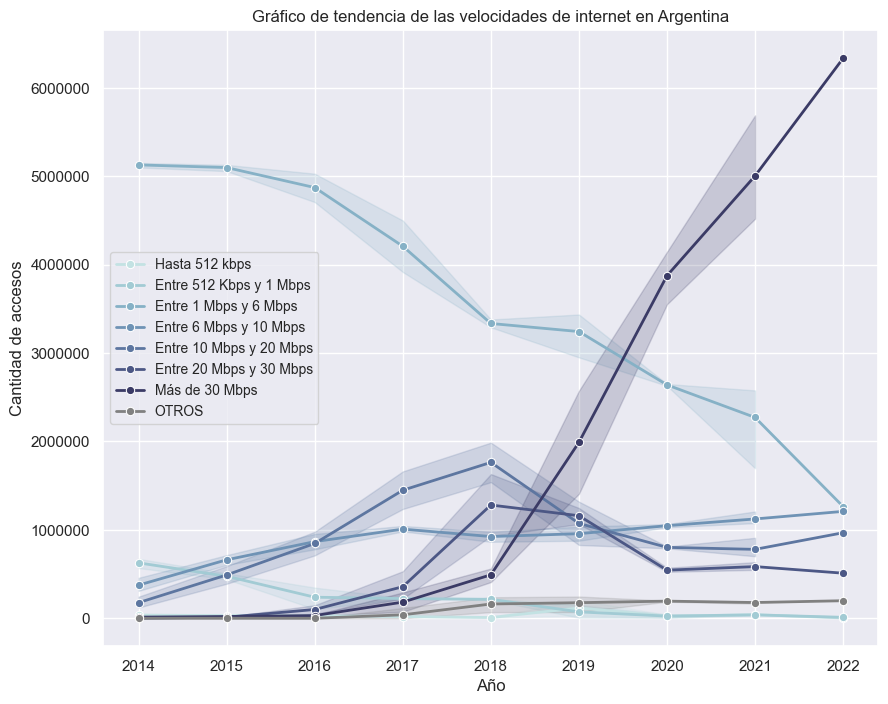

In [7]:
# Grafico de tendencia

# Crear el gráfico de líneas con todas las velocidades de internet juntas
plt.figure(figsize=(10, 8))
# Crear una paleta de colores que aumente gradualmente en intensidad
palette = sns.color_palette("ch:start=.2,rot=-.3", len(df_accesos_veloc_nac.columns[2:-1]))

for i, columna in enumerate(df_accesos_veloc_nac.columns[2:-2]):
    sns.lineplot(data = df_accesos_veloc_nac, x = 'Año', y = columna, marker = 'o', markersize = 6,
                 linewidth = 2, label = columna, color = palette[i])
sns.lineplot(data = df_accesos_veloc_nac, x = 'Año', y = "OTROS", marker = 'o', markersize = 6,
                 linewidth = 2, label = "OTROS", color = "grey")

# Agregar título y etiquetas de los ejes
plt.title('Gráfico de tendencia de las velocidades de internet en Argentina')
plt.xlabel('Año')
plt.ylabel('Cantidad de accesos')

# Formatear automáticamente las etiquetas del eje y en millones
plt.ticklabel_format(style='plain', axis='y', useOffset=False, scilimits=(6, 6))

# Mostrar leyenda
plt.legend(fontsize='small')

# Mostrar el gráfico
plt.show()

Podemos ver que las altas velocidades de internet crecen exponencialmente y las bajas empiezan a entrar en desuso. ¿Tendrá relación con la tecnología?

Accesos por tecnología trimestral - Nacional

In [8]:
df_accesos_tecn_nac = pd.read_csv("Datasets\Internet\Accesos_Internet_fijo_por_tecnología_nacional.csv")

In [9]:
df_accesos_tecn_nac.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,1,1.533.240,6.073.426,2.219.533,545.814,251.996,10.624.009,Ene-Mar 2022
1,2021,4,1.657.615,5.984.240,2.072.236,523.107,252.596,10.489.794,Oct-Dic 2021
2,2021,3,1.950.631,5.826.257,1.566.048,492.415,250.190,10.085.541,Jul-Sept 2021
3,2021,2,2.018.587,5.641.731,1.472.246,476.968,253.552,9.863.084,Abr-Jun 2021
4,2021,1,2.175.211,5.424.782,1.362.976,434.548,250.455,9.647.972,Ene-Mar 2021


In [10]:
# Eliminamos la columna Periodo que es redundante y corregimos los puntos para que tome los valores correctamente.
df_accesos_tecn_nac = df_accesos_tecn_nac.drop(columns = ["Periodo"])
# Mismo conflicto con los puntos que el df anterior.
df_accesos_tecn_nac = df_accesos_tecn_nac.applymap(lambda x: str(x).replace('.', '')).astype(int)

In [11]:
df_accesos_tecn_nac.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,33.000000,33.000000,3.300000e+01,3.300000e+01,3.300000e+01,33.000000,33.000000,3.300000e+01
mean,2017.636364,2.454545,3.137918e+06,4.008480e+06,6.143142e+05,219996.696970,122928.848485,8.132521e+06
std,2.421495,1.148121,7.549299e+05,1.166215e+06,6.127903e+05,170710.285734,96506.644927,1.260190e+06
min,2014.000000,1.000000,1.533240e+06,2.407330e+06,1.391870e+05,1653.000000,543.000000,6.398398e+06
25%,2016.000000,1.000000,2.299457e+06,2.898226e+06,1.677880e+05,82077.000000,56122.000000,6.984831e+06
50%,2018.000000,2.000000,3.574294e+06,3.981129e+06,2.174600e+05,155775.000000,71573.000000,8.037053e+06
75%,2020.000000,3.000000,3.723518e+06,4.903674e+06,1.047817e+06,352333.000000,247016.000000,9.031056e+06
max,2022.000000,4.000000,3.803024e+06,6.073426e+06,2.219533e+06,545814.000000,265328.000000,1.062401e+07


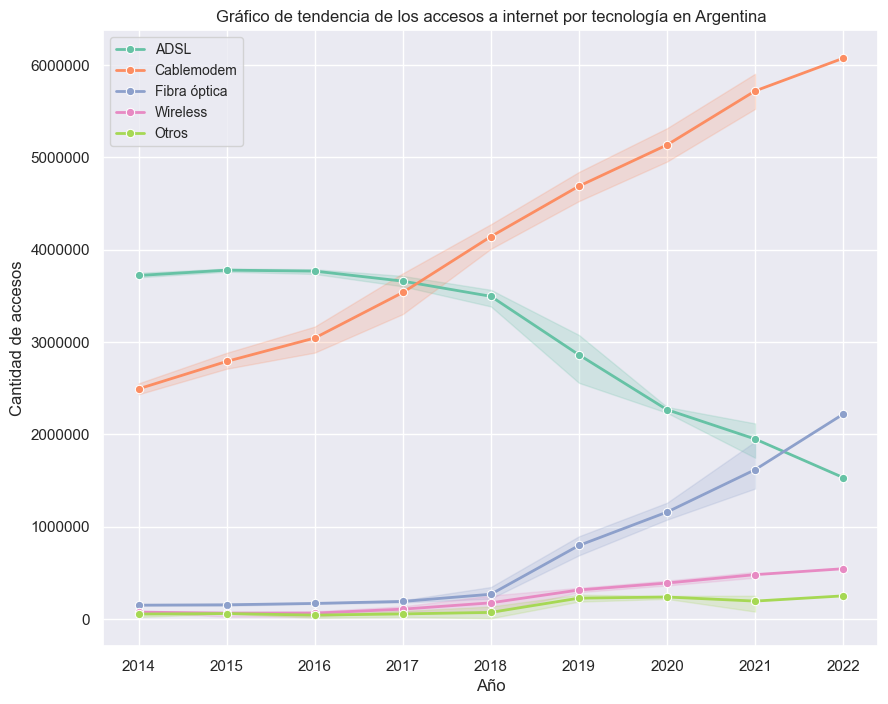

In [12]:
# Hacemos un grafico de tendencia similar al de las velocidades

# Crear el gráfico de líneas con todas las velocidades de internet juntas
plt.figure(figsize=(10, 8))
# Crear una paleta de colores que aumente gradualmente en intensidad
palette = sns.color_palette("Set2", len(df_accesos_tecn_nac.columns[2:-1]))

for i, columna in enumerate(df_accesos_tecn_nac.columns[2:-1]):
    sns.lineplot(data = df_accesos_tecn_nac, x = 'Año', y = columna, marker = 'o', markersize = 6,
                 linewidth = 2, label = columna, color = palette[i])

# Agregar título y etiquetas de los ejes
plt.title('Gráfico de tendencia de los accesos a internet por tecnología en Argentina')
plt.xlabel('Año')
plt.ylabel('Cantidad de accesos')

# Formatear automáticamente las etiquetas del eje y en millones
plt.ticklabel_format(style='plain', axis='y', useOffset=False, scilimits=(6, 6))

# Mostrar leyenda
plt.legend(fontsize='small')

# Mostrar el gráfico
plt.show()

Vemos el punto de inflexión y tendencia alcista en la utilización de fibra óptica en 2018. Cablemodem y fibra óptica son dos productos en distintas etapas de su ciclo de vida. El cablemodem seguramente esté por alcanzar su madurez y la fibra óptica está en clara etapa de crecimiento. ADSL está en un claro declive y Wireless es una solución no escalable al menos en la actualidad, se utiliza en sectores aislados donde otras tecnologías no llegan, por lo que no vemos una tendencia. Luego intentaremos afirmar nuestra hipótesis con mejor información.

### ANALISIS A NIVEL PROVINCIAL

Accesos por rangos de velocidad trimestral - Provincial

In [13]:
df_accesos_veloc_prov = pd.read_csv("Datasets\Internet\Acceso_Internet_Fijo_por_rangos_velocidad_bajada_y_provincia.csv")

In [14]:
df_accesos_veloc_prov.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,1,Buenos Aires,31.591,30.056,313.382,321.756,290.127,161.183,3.381.049,26.280,4.555.424
1,2022,1,Capital Federal,527.000,5.575,39.918,77.390,61.053,43.289,1.188.072,1.717,1.417.541
2,2022,1,Catamarca,71.000,456.000,4.386,7.009,8.773,3.761,35.715,2.207,62.378
3,2022,1,Chaco,461.000,1.099,16.888,21.235,20.898,13.012,62.946,7.580,144.119
4,2022,1,Chubut,113.000,1.677,61.369,31.856,33.080,13.871,14.055,15.607,171.628


In [15]:
df_accesos_veloc_prov.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,OTROS
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,786.000000
mean,2017.636364,2.454545,125.923957,97.393794,72.779756,82.715126,100.582816,26.008611
std,2.386030,1.131306,190.102087,198.510950,143.431382,174.830175,207.784231,113.774689
min,2014.000000,1.000000,1.007000,0.000000,0.000000,0.000000,0.000000,-1.945000
25%,2016.000000,1.000000,9.364500,3.491500,5.186750,4.582250,2.000000,0.000000
50%,2018.000000,2.000000,48.000000,8.894500,19.966000,14.852000,10.402000,0.000000
75%,2020.000000,3.000000,135.500000,84.000000,63.170250,56.480000,65.540250,6.433000
max,2022.000000,4.000000,998.000000,995.000000,917.000000,978.000000,997.000000,898.000000


In [16]:
# En el describe vemos que tenemos un conflicto con los puntos, debemos eliminarlos para que tome bien los valores en las columnas numericas
col_numericas = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', 
'+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']

In [17]:
df_accesos_veloc_prov[col_numericas] = df_accesos_veloc_prov[col_numericas].applymap(lambda x: str(x).replace('.', '')).astype(float)

In [18]:
df_accesos_veloc_prov.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,792.000000,792.000000,792.000000,792.000000,7.920000e+02,792.000000,792.000000,792.000000,7.920000e+02,786.000000,7.920000e+02
mean,2017.636364,2.454545,2921.093434,10672.737374,1.571621e+05,32958.642677,34688.535354,19516.611111,6.663342e+04,4345.507634,3.369959e+05
std,2.386030,1.131306,11129.707017,22152.564797,3.572963e+05,60135.137455,89035.402765,72232.237605,2.980766e+05,10851.307554,7.217149e+05
min,2014.000000,1.000000,60.000000,0.000000,3.576000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,1.240600e+04
25%,2016.000000,1.000000,287.500000,1277.250000,2.926475e+04,2776.000000,1855.250000,145.000000,4.000000e+00,0.000000,5.185200e+04
50%,2018.000000,2.000000,1050.000000,3752.500000,5.159800e+04,7744.500000,7124.000000,1958.000000,6.185000e+02,0.000000,1.008765e+05
75%,2020.000000,3.000000,2650.000000,8419.500000,8.797600e+04,28533.000000,23929.250000,8475.000000,1.392825e+04,4627.750000,1.752460e+05
max,2022.000000,4.000000,199768.000000,171244.000000,2.299705e+06,403575.000000,886678.000000,949093.000000,3.381049e+06,120464.000000,4.555424e+06


In [19]:
# En la columna OTROS tenemos un valor NaN y negativos (no posible). 
# Interpolamos estos valores con trimestre del año anterior y siguiente
df_accesos_veloc_prov[df_accesos_veloc_prov["OTROS"].isna()]

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
265,2019,2,Capital Federal,740.0,1027.0,281370.0,124087.0,239691.0,296155.0,475991.0,NaN,1418395.0
275,2019,2,La Rioja,90.0,110.0,39819.0,4297.0,4857.0,130.0,1298.0,NaN,50304.0
276,2019,2,Mendoza,200.0,2522.0,205165.0,2971.0,10092.0,1256.0,234.0,NaN,222260.0
283,2019,2,Santa Cruz,250.0,840.0,24861.0,3806.0,1202.0,280.0,4.0,NaN,30010.0
286,2019,2,Tierra Del Fuego,60.0,1230.0,41824.0,4241.0,1573.0,960.0,32.0,NaN,47895.0
287,2019,2,Tucumán,160.0,1570.0,78891.0,44296.0,24291.0,6280.0,18394.0,NaN,166673.0


In [20]:
df_accesos_veloc_prov.sort_values(['Provincia','Trimestre', 'Año'], inplace=True)
grouped = df_accesos_veloc_prov.groupby(['Provincia', 'Trimestre'], group_keys = False)

# Interpolar los valores NaN dentro de cada grupo de provincia y trimestre
df_accesos_veloc_prov['OTROS'] = grouped['OTROS'].apply(lambda x: x.interpolate())

In [21]:
# Hay valores negativos, los ponemos en cero
df_accesos_veloc_prov.loc[df_accesos_veloc_prov["OTROS"] < 0, "OTROS"] = 0

In [22]:
# Convertimos estas columnas en entero
df_accesos_veloc_prov[col_numericas] = df_accesos_veloc_prov[col_numericas].astype(int)

In [23]:
# Corregimos la columna Total
columnas_a_sumar = col_numericas.copy()
columnas_a_sumar.remove("Total")
df_accesos_veloc_prov["Total"] = df_accesos_veloc_prov[columnas_a_sumar].sum(axis = 1)

In [24]:
df_accesos_veloc_prov.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,792.000000,792.000000,792.000000,792.000000,7.920000e+02,792.000000,792.000000,792.000000,7.920000e+02,792.000000,7.920000e+02
mean,2017.636364,2.454545,2921.093434,10672.737374,1.571621e+05,32958.642677,34688.535354,19516.611111,6.663342e+04,4354.559343,3.289077e+05
std,2.386030,1.131306,11129.707017,22152.564797,3.572963e+05,60135.137455,89035.402765,72232.237605,2.980766e+05,10819.720248,6.975056e+05
min,2014.000000,1.000000,60.000000,0.000000,3.576000e+03,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.265600e+04
25%,2016.000000,1.000000,287.500000,1277.250000,2.926475e+04,2776.000000,1855.250000,145.000000,4.000000e+00,0.000000,5.372500e+04
50%,2018.000000,2.000000,1050.000000,3752.500000,5.159800e+04,7744.500000,7124.000000,1958.000000,6.185000e+02,0.000000,1.027095e+05
75%,2020.000000,3.000000,2650.000000,8419.500000,8.797600e+04,28533.000000,23929.250000,8475.000000,1.392825e+04,4608.750000,1.759742e+05
max,2022.000000,4.000000,199768.000000,171244.000000,2.299705e+06,403575.000000,886678.000000,949093.000000,3.381049e+06,120464.000000,4.531772e+06


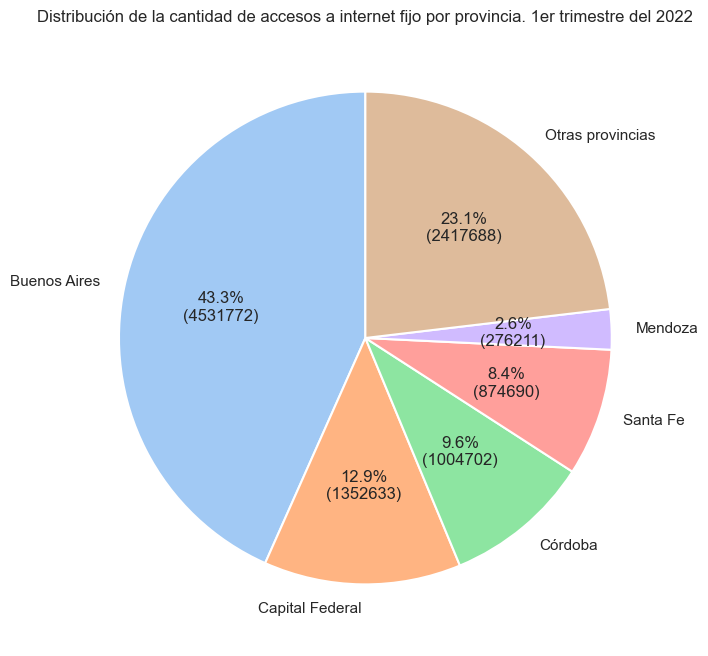

In [25]:
# Ejemplo de grafico de torta para un trimestre determinado

df_trimestre = df_accesos_veloc_prov[(df_accesos_veloc_prov['Año'] == 2022) & (df_accesos_veloc_prov['Trimestre'] == 1)]
df_trimestre = df_trimestre.sort_values("Total", ascending = False)
suma_resto = df_trimestre['Total'].iloc[5:].sum()
# Crear una nueva fila para representar las provincias agrupadas
df_agrupado = pd.DataFrame({'Provincia': ['Otras provincias'], 'Total': [suma_resto]})
df_trimestre = pd.concat([df_trimestre.head(5), df_agrupado])

plt.figure(figsize=(8, 8))
plt.pie(df_trimestre["Total"], labels = df_trimestre["Provincia"], autopct = lambda p: f"{p:.1f}%\n({int(p * sum(df_trimestre['Total']) / 100)})", 
        startangle = 90, colors = sns.color_palette('pastel'), wedgeprops = {'linewidth': 1.5, 'edgecolor': 'white'})

# Agregar título
plt.title("Distribución de la cantidad de accesos a internet fijo por provincia. 1er trimestre del 2022")

# Mostrar el gráfico
plt.show()

Podemos ver que la información está distribuida trimestralmente entre el año 2014 y 2022. No sabemos a qué se refiere la categoría OTROS, tal vez sean velocidades superiores

In [26]:
df_accesos_tecn_prov = pd.read_csv("Datasets\Internet\Acceso_Internet_fijo_por_tecnología_y_provincia.csv", skipfooter = 1)     # La ultima fila es una aclaración
df_accesos_tecn_prov.head()

C:\Users\Mauricio Figueroa\AppData\Local\Temp\ipykernel_9268\435269648.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df_accesos_tecn_prov = pd.read_csv("Datasets\Internet\Acceso_Internet_fijo_por_tecnología_y_provincia.csv", skipfooter = 1)     # La ultima fila es una aclaración


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,1,Buenos Aires,392.045,2.728.865,1.242.121,125.521,66.872,4.555.424
1,2022,1,Capital Federal,102.290,1.217.225,62.308,5.784,29.934,1.417.541
2,2022,1,Catamarca,14.181,15.517,29.118,1.328,2.234,62.378
3,2022,1,Chaco,32.391,64.546,36.662,8.164,2.356,144.119
4,2022,1,Chubut,44.133,66.667,9.184,30.592,21.052,171.628


In [27]:
df_accesos_tecn_prov["Año"].unique()

array(['2022', '2021', '2020', '2019', '2019 *', '2018', '2017', '2016',
       '2015', '2014'], dtype=object)

In [28]:
# Ordenamos el dataframe por
df_accesos_tecn_prov.sort_values(['Provincia','Trimestre', 'Año'], inplace=True)

In [29]:
# Las columnas año y trimestre tienen * al final en algunas filas, limpiamos esas marcas
# (Es una aclaración de que esos períodos no coinciden a nivel nacional, luego veremos que hacemos)
df_accesos_tecn_prov[["Año", "Trimestre"]] = df_accesos_tecn_prov[["Año", "Trimestre"]].apply(lambda x: x.str.replace('*', '', regex = False).str.strip()).astype(int)

In [30]:
# Conflicto con los puntos en las filas numericas, corregimos
df_accesos_tecn_prov.iloc[:,3:] = df_accesos_tecn_prov.iloc[:,3:].applymap(lambda x: str(x).replace('.', '').replace('-', '').strip()).astype(int)

C:\Users\Mauricio Figueroa\AppData\Local\Temp\ipykernel_9268\3786905390.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_accesos_tecn_prov.iloc[:,3:] = df_accesos_tecn_prov.iloc[:,3:].applymap(lambda x: str(x).replace('.', '').replace('-', '').strip()).astype(int)


In [31]:
# Con el dataset limpio, podemos ver la distribución de las columnas
df_accesos_tecn_prov.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,792.000000,792.000000,7.920000e+02,7.920000e+02,7.920000e+02,792.000000,792.000000,7.920000e+02
mean,2017.636364,2.454545,1.316825e+05,1.670200e+05,2.466053e+04,9566.222222,6400.114899,3.388551e+05
std,2.386030,1.131306,2.614150e+05,4.104339e+05,1.043061e+05,17114.840986,9766.495147,7.267605e+05
min,2014.000000,1.000000,7.987000e+03,0.000000e+00,0.000000e+00,0.000000,13.000000,1.255700e+04
25%,2016.000000,1.000000,2.263600e+04,7.784000e+03,1.270000e+02,251.000000,637.500000,5.187900e+04
50%,2018.000000,2.000000,4.888400e+04,3.405850e+04,9.980000e+02,3936.500000,2685.000000,1.006600e+05
75%,2020.000000,3.000000,1.078012e+05,6.859675e+04,1.079325e+04,11897.250000,7377.500000,1.720025e+05
max,2022.000000,4.000000,1.586343e+06,2.728865e+06,1.242121e+06,126887.000000,73415.000000,4.555424e+06


Vamos a analizar si la tecnología está relacionada con la velocidad de descarga (comparamos datasets de tecnologia y velocidad por provincia)

In [32]:
# Ambos dataset tienen 792 filas, estan ordenados por Año, Trimestre y Provincia. 
# Buscamos una posible relación lineal entre variables de velocidad y tecnología
corr_matrix = pd.concat([df_accesos_tecn_prov.iloc[:, 3:8], df_accesos_veloc_prov.iloc[:, 3:11]], axis=1).corr()

In [33]:
corr_matrix

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS
ADSL,1.000000,0.763742,0.417841,0.399197,0.474271,0.412320,0.773173,0.971673,0.733454,0.722633,0.514257,0.268515,0.292727
Cablemodem,0.763742,1.000000,0.791173,0.644231,0.703311,0.534858,0.488079,0.756083,0.790056,0.741983,0.655744,0.772960,0.331333
Fibra óptica,0.417841,0.791173,1.000000,0.754043,0.639540,0.509692,0.217560,0.428995,0.546604,0.425813,0.436139,0.919301,0.226539
Wireless,0.399197,0.644231,0.754043,1.000000,0.724918,0.437218,0.169445,0.377454,0.525946,0.438741,0.523366,0.673368,0.558064
Otros,0.474271,0.703311,0.639540,0.724918,1.000000,0.322567,0.273931,0.477738,0.558132,0.457722,0.418578,0.656350,0.491723
HASTA 512 kbps,0.412320,0.534858,0.509692,0.437218,0.322567,1.000000,0.260442,0.381800,0.343238,0.427762,0.597349,0.430092,0.141125
+ 512 Kbps - 1 Mbps,0.773173,0.488079,0.217560,0.169445,0.273931,0.260442,1.000000,0.778680,0.432593,0.409788,0.240814,0.089172,0.094730
+ 1 Mbps - 6 Mbps,0.971673,0.756083,0.428995,0.377454,0.477738,0.381800,0.778680,1.000000,0.680132,0.651825,0.405551,0.267719,0.214938
+ 6 Mbps - 10 Mbps,0.733454,0.790056,0.546604,0.525946,0.558132,0.343238,0.432593,0.680132,1.000000,0.734392,0.532183,0.478479,0.343219
+ 10 Mbps - 20 Mbps,0.722633,0.741983,0.425813,0.438741,0.457722,0.427762,0.409788,0.651825,0.734392,1.000000,0.648687,0.339763,0.406127


<Axes: >

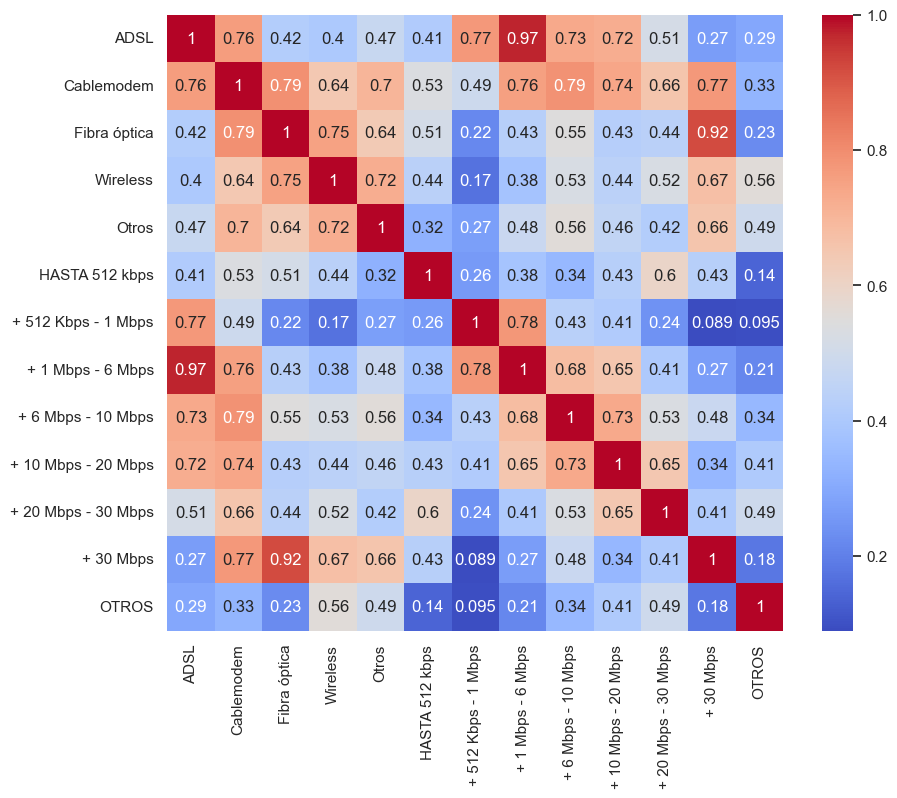

In [34]:
# Mapa de correlación y calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', square = True)

Efectivamente vemos una fuerte correlación en velocidades bajas y ADSL, velocidades medias y CABLEMODEM y +30 Mbps con Fibra óptica (0.92).
Mi conclusión es que debemos invertir en fibra óptica porque la tendencia del mercado es hacia mayores velocidades y la fibra óptica es lo adecuado. Vamos a buscar respaldar nuestra hipótesis.

Dataset complementario extraído de Eurostat, almacén de datos de la Unión Europea https://ec.europa.eu/eurostat/web/main/data/database

In [35]:
# Broadband internet coverage by speed (isoc_cbs)

coverage_by_speed = pd.read_csv('Datasets\Complementarios\isoc_cbs.tsv', sep='\t')

In [36]:
coverage_by_speed.head()

,"unit,inet_spd,terrtypo,geo\time",2021,2020,2019,2018,2017,2016,2015,2014,2013
0,"PC_HH,GBPS_GT1,TOTAL,AT",45.4,36.9,13.8,:,:,:,:,:,:
1,"PC_HH,GBPS_GT1,TOTAL,BE",69,49.4,49.2,:,:,:,:,:,:
2,"PC_HH,GBPS_GT1,TOTAL,BG",15.9,8.6,6.5,:,:,:,:,:,:
3,"PC_HH,GBPS_GT1,TOTAL,CH",63.7,62.9,40.3,:,:,:,:,:,:
4,"PC_HH,GBPS_GT1,TOTAL,CY",41.4,26.2,10.1,:,:,:,:,:,:


In [37]:
# Todos los valores tienen un espacio, lo eliminamos para todos los valores
coverage_by_speed = coverage_by_speed.applymap(lambda x: str(x).strip())
# Las columnas de años también, corregimos
coverage_by_speed.columns = coverage_by_speed.columns.str.strip()

In [38]:
# El dataset tiene columnas agrupadas. Las separamos
coverage_by_speed[['unit', 'inet_spd', 'terrtypo', 'geo\\time']] = coverage_by_speed['unit,inet_spd,terrtypo,geo\\time'].str.split(',', expand = True)
coverage_by_speed = coverage_by_speed.drop(columns = ['unit,inet_spd,terrtypo,geo\\time'])

In [39]:
# Relleno los valores que tiene : con None
coverage_by_speed.replace(":", None, inplace = True)
# Las columnas con valores, las hacemos float
coverage_by_speed.iloc[:,:8] = coverage_by_speed.iloc[:,:8].astype(float)

In [40]:
coverage_by_speed

,2021,2020,2019,2018,2017,2016,2015,2014,2013,unit,inet_spd,terrtypo,geo\time
0,45.4,36.9,13.8,NaN,NaN,NaN,NaN,NaN,None,PC_HH,GBPS_GT1,TOTAL,AT
1,69.0,49.4,49.2,NaN,NaN,NaN,NaN,NaN,None,PC_HH,GBPS_GT1,TOTAL,BE
2,15.9,8.6,6.5,NaN,NaN,NaN,NaN,NaN,None,PC_HH,GBPS_GT1,TOTAL,BG
3,63.7,62.9,40.3,NaN,NaN,NaN,NaN,NaN,None,PC_HH,GBPS_GT1,TOTAL,CH
4,41.4,26.2,10.1,NaN,NaN,NaN,NaN,NaN,None,PC_HH,GBPS_GT1,TOTAL,CY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,93.7,87.0,82.0,75.6,67.9,66.9,65.9,64.8,34.5,PC_HH,MBPS_GT30,TOTAL,RO
124,88.9,87.5,85.1,81.9,77.9,74.2,72.6,72.6,72.1,PC_HH,MBPS_GT30,TOTAL,SE
125,89.5,87.6,86.9,85.9,83.2,81.6,78.1,74.6,71.1,PC_HH,MBPS_GT30,TOTAL,SI
126,82.3,74.1,70.9,72.4,70.0,64.3,53.9,48.8,45.9,PC_HH,MBPS_GT30,TOTAL,SK


In [41]:
# Nos interesa saber la cobertura en general de la Unión europea, no un país particular, así que agrupamos por velocidades.
aux_coverage_by_speed = coverage_by_speed.groupby("inet_spd").mean()
aux_coverage_by_speed = aux_coverage_by_speed.reindex(columns = aux_coverage_by_speed.columns[::-1]).reset_index()      # Ordenamos de 2014 a 2022         
aux_coverage_by_speed = aux_coverage_by_speed.set_index("inet_spd")

C:\Users\Mauricio Figueroa\AppData\Local\Temp\ipykernel_9268\1976536468.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aux_coverage_by_speed = coverage_by_speed.groupby("inet_spd").mean()


In [42]:

# Convertir el DataFrame en un formato adecuado para Seaborn
aux_coverage_by_speed = aux_coverage_by_speed.T     # Invertimos filas por columnas
aux_coverage_by_speed = aux_coverage_by_speed.reset_index()
aux_coverage_by_speed = aux_coverage_by_speed.rename(columns = {"index": "Year"})
aux_coverage_by_speed = aux_coverage_by_speed[["Year", "MBPS_GT2", "MBPS_GT30", "MBPS_GT100", "GBPS_GT1"]]      # Damos el orden creciente de velocidad

In [43]:
aux_coverage_by_speed

inet_spd,Year,MBPS_GT2,MBPS_GT30,MBPS_GT100,GBPS_GT1
0,2014,94.546875,69.265625,51.993750,NaN
1,2015,94.875000,72.231250,55.218750,NaN
2,2016,94.662500,75.603125,58.087500,NaN
3,2017,94.687500,79.037500,61.768750,NaN
4,2018,94.890625,82.650000,66.425000,NaN
5,2019,95.446875,85.825000,74.512500,38.059375
6,2020,96.459375,88.790625,79.146875,48.328125
7,2021,NaN,92.206250,84.203125,59.750000


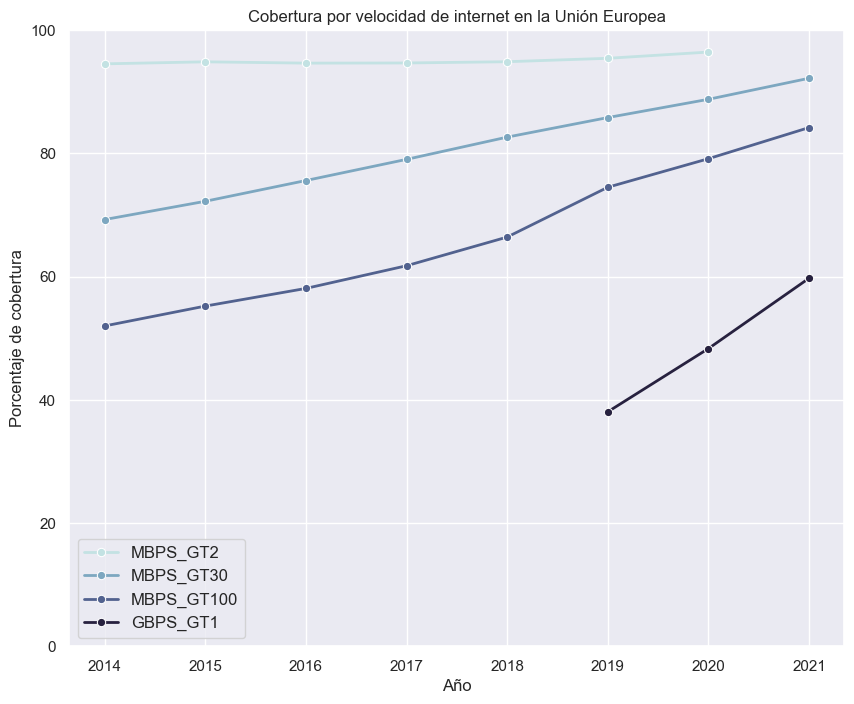

In [44]:
# Gráfico de líneas con las velocidades de la UE
plt.figure(figsize=(10, 8))

# Paleta de colores que aumenta gradualmente en intensidad
palette = sns.color_palette("ch:start=.2,rot=-.3", len(aux_coverage_by_speed.columns[1:]))

for i, columna in enumerate(aux_coverage_by_speed.columns[1:]):
    sns.lineplot(data = aux_coverage_by_speed, x = 'Year', y = columna, marker = 'o', markersize = 6,
                 linewidth = 2, label = columna, color = palette[i])

# Titulo y etiquetas de los ejes
plt.title('Cobertura por velocidad de internet en la Unión Europea')
plt.xlabel('Año')
plt.ylabel('Porcentaje de cobertura')
plt.ylim(0, 100) 
plt.legend(fontsize = 'medium')

plt.show()

Como vemos, en el año 2019 el 75% de Europa contaba con redes de fibra de + de 100 Mbps y el 40% con redes de + 1 Gbps. Al 2021 el 60% del territorio está cubierto con redes por encima del Gbps de velocidad de descarga. Con estos resultados vemos que Argentina está atrasada al menos 5 años respecto a la UE, siendo generosos. La brecha es importante y nos brinda una gran oportunidad de negocio.

Siguiendo con el análisis de la UE, vamos a ver la cobertura por tecnología.

In [45]:
# Broadband internet coverage by technology (isoc_cbt)

coverage_by_technology = pd.read_csv('Datasets\Complementarios\isoc_cbt.tsv', sep='\t')

In [62]:
coverage_by_technology.head()

,"unit,inet_tec,terrtypo,geo\time",2021,2020,2019,2018,2017,2016,2015,2014,2013
0,"PC_HH,5G,DEG3,AT",36.3,7.5,:,:,:,:,:,:,:
1,"PC_HH,5G,DEG3,BE",0,0,:,:,:,:,:,:,:
2,"PC_HH,5G,DEG3,BG",8.6,0,:,:,:,:,:,:,:
3,"PC_HH,5G,DEG3,CH",88.8,40,:,:,:,:,:,:,:
4,"PC_HH,5G,DEG3,CY",32.2,0,:,:,:,:,:,:,:


In [63]:
# Hacemos el mismo ETL que el dataset anterior, tienen el mismo formato

# Todos los valores tienen un espacio, lo eliminamos para todos los valores
coverage_by_technology = coverage_by_technology.applymap(lambda x: str(x).strip())
# Las columnas de años también, corregimos
coverage_by_technology.columns = coverage_by_technology.columns.str.strip()
# El dataset tiene columnas agrupadas. Las separamos
coverage_by_technology[['unit', 'inet_tec', 'terrtypo', 'geo\\time']] = coverage_by_technology['unit,inet_tec,terrtypo,geo\\time'].str.split(',', expand = True)
coverage_by_technology = coverage_by_technology.drop(columns = ['unit,inet_tec,terrtypo,geo\\time'])
# Relleno los valores que tiene : con None
coverage_by_technology.replace(":", None, inplace = True)
# Las columnas con valores, las hacemos float
coverage_by_technology.iloc[:,:8] = coverage_by_technology.iloc[:,:8].astype(float)

Analizamos solo la cobertura de la red de fibra óptica en la UE (FTTP: Fiber to the premises)

In [81]:
# https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Country_codes

aux_coverage_by_technology = coverage_by_technology[coverage_by_technology["inet_tec"] == "FTTP"].sort_values("2021", ascending = False).head(10)

In [91]:
aux_coverage_by_technology

,2021,2020,2019,2018,2017,2016,2015,2014,2013,unit,inet_tec,terrtypo,geo\time
501,89.5,88.1,88.1,87.8,85.7,85.2,85.0,83.9,82.9,PC_HH,FTTP,TOTAL,LV
490,88.9,84.9,80.4,77.4,71.4,62.8,52.8,44.8,22.7,PC_HH,FTTP,TOTAL,ES
506,87.6,82.3,76.6,70.2,63.6,49.6,47.2,45.3,42.1,PC_HH,FTTP,TOTAL,PT
497,87.6,83.5,80.4,76.2,72.3,71.1,60.4,59.9,60.8,PC_HH,FTTP,TOTAL,IS
507,87.1,75.9,68.1,62.7,61.0,59.7,58.2,58.0,54.7,PC_HH,FTTP,TOTAL,RO
482,84.7,75.2,65.2,54.2,45.2,38.2,32.2,28.3,22.9,PC_HH,FTTP,TOTAL,BG
508,82.5,80.5,77.1,72.2,66.4,60.8,56.4,56.4,51.8,PC_HH,FTTP,TOTAL,SE
465,78.4,66.3,54.7,39.4,29.1,24.0,2.3,2.3,2.1,PC_HH,FTTP,DEG3,IS
499,78.2,67.1,61.0,60.6,54.4,50.1,49.6,49.2,48.7,PC_HH,FTTP,TOTAL,LT
455,77.8,70.9,65.8,60.8,54.8,49.0,45.6,42.0,4.2,PC_HH,FTTP,DEG3,DK


In [92]:
# Debemos modificar los country codes de 2 letras a 3 para poder hacer el mapa de Europa con los países.
aux_coverage_by_technology["geo\\time"] = ["LVA", "ESP", "PRT", "ISL", "ROU", "BGR", "SWE", "ISL", "LTU", "DNK"]

C:\Users\Mauricio Figueroa\AppData\Local\Temp\ipykernel_9268\4241325470.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


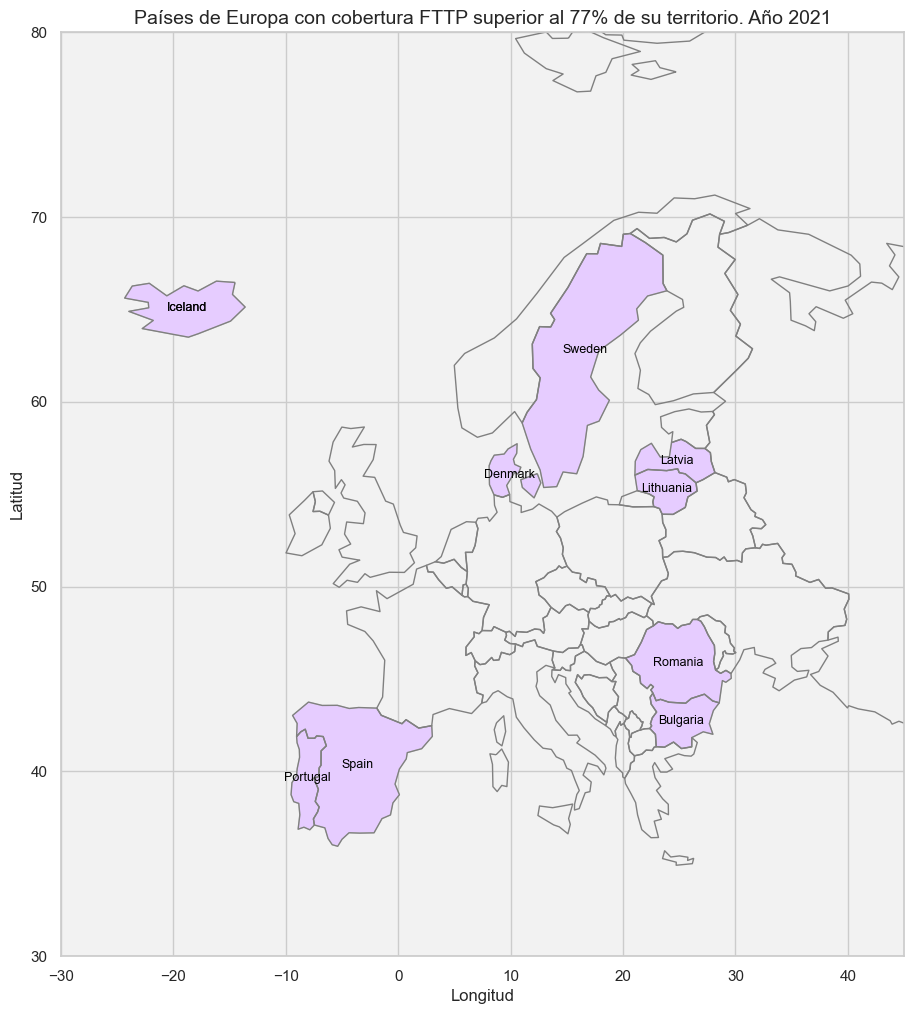

In [115]:
# Usamos geopandas para cargar los datos geográficos de Europa
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world['continent'] == 'Europe']
# Fusionamos los datos geográficos con nuestros datos
merged = europe.merge(aux_coverage_by_technology, left_on = 'iso_a3', right_on='geo\\time')

fig, ax = plt.subplots(figsize=(12, 12))
# Establecer el color de fondo del mapa
ax.set_facecolor('#F2F2F2')  # Color de fondo gris claro

# Configurar los colores y leyenda
cmap = 'YlGnBu'
# Graficar el contorno de Europa
europe.boundary.plot(ax=ax, linewidth=1.0, color='grey')
# Pintar los países con mejor conectividad de fibra óptica
color = '#E6CCFF'
merged.plot(color = color, linewidth = 0.8, ax = ax, edgecolor = '0.8')
# Agregar los nombres de los países
for geometry, label in zip(merged.geometry, merged['name']):
    x, y = geometry.centroid.coords[0]
    ax.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points", fontsize = 9, color='black', ha='center', va='center')

ax.set_xlim(-30, 45)  # Ajustar según las coordenadas geográficas de Europa
ax.set_ylim(30, 80)

# Titulo y etiquetas
ax.set_title('Países de Europa con cobertura FTTP superior al 77% de su territorio. Año 2021', fontdict={'fontsize': '14'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

plt.show()

Como conclusión podemos decir que el futuro de nuestro país a un mediano plazo será la integración de la fibra óptica en la gran cantidad del territorio, como sucede en Europa. En 2023 estos países con la mejor conectividad de Europa deben contar con un 90% de cobertura de fibra óptica.

In [46]:
# Vamos a hacer una comparación de velocidades entre Córdoba y CABA. Tomaremos el primer trimestre de 2022 (dato mas reciente)
auxiliar_veloc = df_accesos_veloc_prov[(df_accesos_veloc_prov["Año"] == 2022) & (df_accesos_veloc_prov["Trimestre"] == 1)]
auxiliar_veloc.reset_index(drop = True, inplace = True)

In [47]:
# Lo normalizamos para obtener porcentajes del total de cada provincia
auxiliar_veloc.iloc[:, 3:-1] = auxiliar_veloc.iloc[:, 3:-1].apply(lambda x: x/auxiliar_veloc.iloc[:, -1]*100)

C:\Users\Mauricio Figueroa\AppData\Local\Temp\ipykernel_9268\3942843528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auxiliar_veloc.iloc[:, 3:-1] = auxiliar_veloc.iloc[:, 3:-1].apply(lambda x: x/auxiliar_veloc.iloc[:, -1]*100)


In [48]:
cordoba_veloc = auxiliar_veloc.iloc[np.where(auxiliar_veloc["Provincia"] == "Córdoba")[0], 3:-2].values[0].tolist()
capital_veloc = auxiliar_veloc.iloc[np.where(auxiliar_veloc["Provincia"] == "Capital Federal")[0], 3:-2].values[0].tolist()
velocidades = auxiliar_veloc.columns[3:-2]

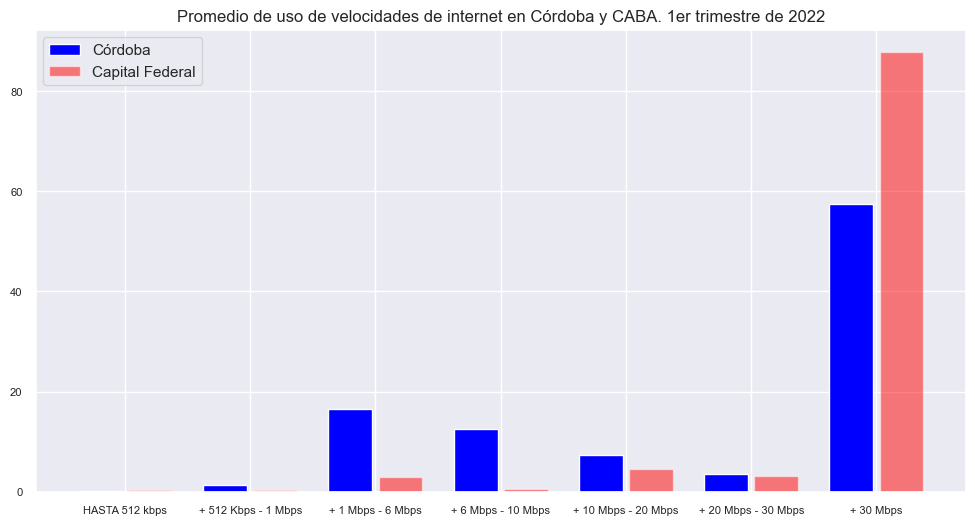

In [49]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))
indice = np.arange(len(velocidades))

# Graficar las barras de la Provincia A
ax.bar(x = indice, height = cordoba_veloc, width = 0.35, color='blue', label = 'Córdoba')

# Graficar las barras de la Provincia B
ax.bar(x = indice+0.4, height = capital_veloc, width = 0.35, color='red', label = 'Capital Federal', alpha=0.5)

# Configurar los ticks del eje x, las etiquetas y el título
ax.set_title("Promedio de uso de velocidades de internet en Córdoba y CABA. 1er trimestre de 2022")
ax.set_xticks(indice+0.2)
ax.set_xticklabels(velocidades)
ax.tick_params(labelsize = 8)
ax.legend()

plt.show()

En Córdoba se nota la fuerte presencia de bajas velocidades en relación a CABA. En un futuro esta brecha en la conectividad se irá recortando por lo que vemos una oportunidad de mercado de la fibra óptica en la migración de usuarios de ADSL a fibra.

¿En qué localidades podríamos hacer sitio, establecer nuestro plan de trabajo? ¿Cuáles son aquellas con una baja calidad de conectividad y que a su vez sean convenientes para establecer un plan de trabajo, oportunidades de inversión y demás.

### Accesos a internet fijo por tecnología y localidad

In [50]:
df_accesos_tecn_localidad = pd.read_csv("Datasets\Internet\Accesos_Internet_fijo_por_tecnología_y_localidad.csv")
df_accesos_tecn_localidad.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,914,4.704,- 0,5,- 0,975,- 0,664,7.262,NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,- 0,18,- 0,- 0,327,1.127,NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6,NaN


In [51]:
# Eliminamos la ultima columna
df_accesos_tecn_localidad = df_accesos_tecn_localidad.drop(columns = ["Unnamed: 13"])

In [52]:
# Corregimos puntos y guiones
df_accesos_tecn_localidad.iloc[:,4:] = df_accesos_tecn_localidad.iloc[:,4:].applymap(lambda x: str(x).replace('.', '').replace('-', '').strip()).astype(int)

In [53]:
df_accesos_tecn_localidad

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,914,4704,0,5,0,975,0,664,7262
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,0,18,0,0,327,1127
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122,TUCUMAN,Tafí Viejo,El Cadillal,90105070,0,0,0,0,0,1,0,0,1
3123,TUCUMAN,Trancas,San Pedro de Colalao,90112020,0,0,0,0,0,0,0,234,234
3124,TUCUMAN,Trancas,Villa de Trancas,90112030,197,0,0,0,0,0,0,111,308
3125,TUCUMAN,Yerba Buena,Villa Carmela,90119020,2062,0,0,0,1,0,0,97,2160


Queremos analizar las localidades de la provincia de Córdoba

In [54]:
df_accesos_cordoba = df_accesos_tecn_localidad.loc[df_accesos_tecn_localidad["Provincia"] == "CORDOBA"]

In [55]:
# Ordenamos de mayor a menor, por cantidad de accesos a internet
df_accesos_cordoba = df_accesos_cordoba.sort_values("Total general", ascending = False)

In [56]:
df_accesos_cordoba.head(10)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
953,CORDOBA,Capital,Córdoba,14014010,77123,249312,47,139616,1218,11,0,4288,471615
1127,CORDOBA,Río Cuarto,Río Cuarto,14098230,8670,43153,1,7711,1,5,0,1254,60795
1015,CORDOBA,General San Martín,Villa María,14042170,2712,14618,0,10567,0,1,0,2022,29920
1104,CORDOBA,Punilla,Villa Carlos Paz,14091250,2180,20734,0,29,1,2,0,642,23588
1230,CORDOBA,San Justo,San Francisco,14140360,3864,16345,0,36,60,0,0,1222,21527
1277,CORDOBA,Tercero Arriba,Río Tercero,14161150,1176,8520,0,10003,0,1,0,1168,20868
1241,CORDOBA,Santa María,Alta Gracia,14147010,4684,10146,0,2,0,0,0,327,15159
1295,CORDOBA,Unión,Bell Ville,14182060,631,7823,0,3337,0,0,0,0,11791
960,CORDOBA,Colón,Jesús María,14021140,1516,3625,0,6088,0,0,0,12,11241
1051,CORDOBA,Marcos Juárez,Marcos Juárez,14063180,698,9503,0,12,0,0,0,239,10452


Vemos que de las grandes localidades, hay varias donde el ADSL y CableMODEM continúan siendo las tecnologías de referencia. La red de fibra óptica no se ha posicionado aún. Vamos a hacer algunos gráficos comparativos.

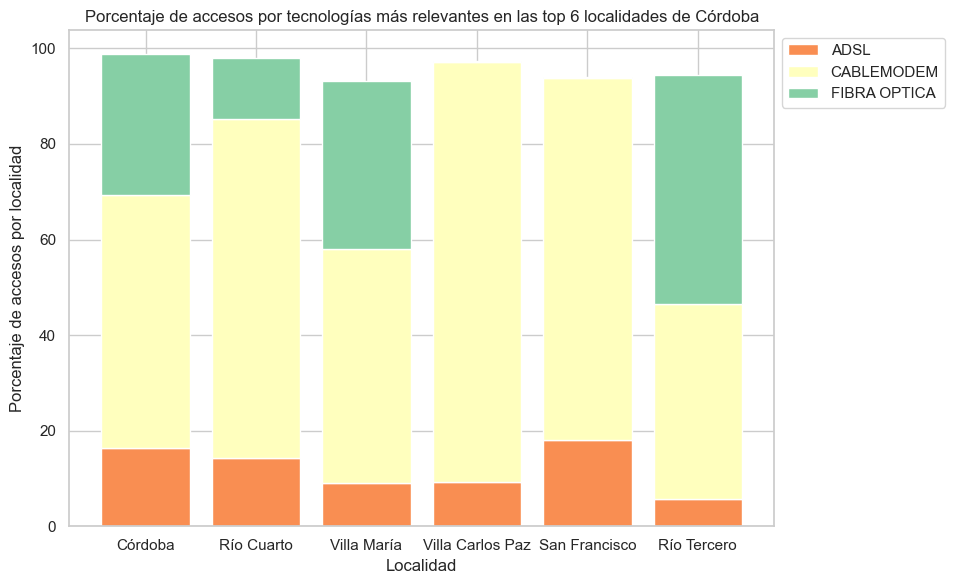

In [57]:
# Seleccionar las columnas de interés
columnas_graficar = ['ADSL', 'CABLEMODEM', 'FIBRA OPTICA']

# Filtrar el DataFrame
df_bar_plot = df_accesos_cordoba[['Localidad'] + columnas_graficar + ["Total general"]].head(6)

# Dividir cada columna por la columna "Total general"
for columna in columnas_graficar:
    df_bar_plot[columna] = df_bar_plot[columna] / df_bar_plot["Total general"] * 100

# Configurar el estilo de Seaborn
sns.set(style='whitegrid')

# Crear el gráfico de barras apiladas
plt.figure(figsize=(8, 6))
palette = sns.color_palette("Spectral", len(columnas_graficar))  # Generar una paleta de colores automáticamente

# Variable para almacenar las alturas acumuladas de las barras
bottom = np.zeros(len(df_bar_plot['Localidad']))

for i, columna in enumerate(columnas_graficar):
    plt.bar(df_bar_plot['Localidad'], df_bar_plot[columna], bottom=bottom, color=palette[i], label=columna)
    bottom += df_bar_plot[columna]  # Actualizar las alturas acumuladas

# Agregar título y etiquetas de los ejes
plt.title('Porcentaje de accesos por tecnologías más relevantes en las top 6 localidades de Córdoba')
plt.xlabel('Localidad')
plt.ylabel('Porcentaje de accesos por localidad')

# Ajustar el tamaño del gráfico
plt.tight_layout()

# Mostrar la leyenda
plt.legend(bbox_to_anchor = (1, 1), loc='upper left')

En ciudades importantes de la provincia de Córdoba como Carlos Paz o San Francisco es casi nula la cantidad de accesos por fibra óptica, podemos trabajar sobre ello.